# Tutorial 3

## 1. Backpropagation (without Python)

Take a look at the following simple neural network.

<center>
<img src="https://raw.githubusercontent.com/SvenKlaassen/DL-Lecture-Figures/main/figures/simple_nn.png" alt="Simple Network" style="width: 800px;"/><br>
<b>Figure 1:</b> Simple Neural Network.</center>

Here, $\sigma_1$ and $\sigma_2$ are ReLU. Further the weights are set to

$$ v_1=\begin{pmatrix} 1\\2 \end{pmatrix}, v_2=\begin{pmatrix} -3\\4 \end{pmatrix} \text{ and }w=\begin{pmatrix} -2\\1\\0.5 \end{pmatrix}.$$

Assume you observe the features $x=(1,1)^T$ with outcome $y=4$.

a) Calculate one forward pass through the model to obtain the predicted value $\hat{y}$. What is the corresponding squared loss?

b) Perform a backward pass through the model and calculate the gradient of the loss function with respect to all parameters of the model.

c) (Optional) Validate your results using python.

It holds

$$\begin{align}
\sigma_1(v_1^Tx) &= \text{ReLU}(1\cdot 1+(-3)\cdot 1)=\text{ReLU}(-2)=0\\
\sigma_2(v_2^Tx) &= \text{ReLU}(2\cdot 1+4\cdot 1)=\text{ReLU}(6)=6\\
\hat{y} &= w^T\sigma(X) =1\cdot0+0.5\cdot 6-2 = 1
\end{align}$$

Therefore, the loss is $l(\hat{y},y)=(1-4)^2=9$.

It holds for $y = 4$ (we are abusing notation a bit)

$$\begin{align}
\frac{\partial l(\hat{y},y)}{\partial \hat{y}} &= 2\left(\hat{y}-y\right) =  -6
\end{align}$$

Then it follows

$$\begin{align}
\frac{\partial l(\hat{y},y)}{\partial w_0} &=\frac{\partial l(\hat{y},y)}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w_0}=-6\cdot\frac{\partial \left(w_0\cdot 1+ w_1\cdot \sigma_1(v_1^Tx)+w_2\cdot \sigma_2(v_2^Tx)\right)}{\partial w_0}=-6\cdot 1=-6\\
\frac{\partial l(\hat{y},y)}{\partial w_1} &=\frac{\partial l(\hat{y},y)}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w_1}=-6\cdot\frac{\partial \left(w_0\cdot 1+ w_1\cdot \sigma_1(v_1^Tx)+w_2\cdot \sigma_2(v_2^Tx)\right)}{\partial w_1}=-6\cdot\sigma_1(v_1^Tx)=0\\
\frac{\partial l(\hat{y},y)}{\partial w_2} &=\frac{\partial l(\hat{y},y)}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w_2}=-6\cdot\frac{\partial \left(w_0\cdot 1+ w_1\cdot \sigma_1(v_1^Tx)+w_2\cdot \sigma_2(v_2^Tx)\right)}{\partial w_2}=-6\cdot \sigma_2(v_2^Tx)=-36
\end{align}$$


Further for the hidden layer, it holds

$$\begin{align}
\frac{\partial l(\hat{y},y)}{\sigma_1(v_1^Tx)} &=\frac{\partial l(\hat{y},y)}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \sigma_1(v_1^Tx)}=-6\cdot \frac{\partial \left(w_0\cdot 1+ w_1\cdot \sigma_1(v_1^Tx)+w_2\cdot \sigma_2(v_2^Tx)\right)}{\partial \sigma_1(v_1^Tx)}=-6\cdot w_1 = -6\\
\frac{\partial l(\hat{y},y)}{\sigma_2(v_2^Tx)} &=\frac{\partial l(\hat{y},y)}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial \sigma_2(v_2^Tx)}=-6\cdot \frac{\partial \left(w_0\cdot 1+ w_1\cdot \sigma_1(v_1^Tx)+w_2\cdot \sigma_2(v_2^Tx)\right)}{\partial \sigma_1(v_2^Tx)}=-6\cdot w_2 = -3
\end{align}$$

and

$$\begin{align}
\frac{\partial l(\hat{y},y)}{\partial v_1^Tx} &=\frac{\partial l(\hat{y},y)}{\partial \sigma_1(v_1^Tx)}\frac{\partial \sigma_1(v_1^Tx)}{\partial v_1^Tx}=-6\cdot \frac{\partial \text{ReLU}(v_1^Tx)}{\partial v_1^Tx}=-6\cdot 0 = 0\\
\frac{\partial l(\hat{y},y)}{\partial v_2^Tx} &=\frac{\partial l(\hat{y},y)}{\partial \sigma_2(v_2^Tx)}\frac{\partial \sigma_2(v_2^Tx)}{\partial v_2^Tx}=-3\cdot \frac{\partial \text{ReLU}(v_2^Tx)}{\partial v_2^Tx}=-3\cdot 1 = -3\\
\end{align}$$


(Of course this can be done much faster, e.g. by relying on the properties of the ReLU.)

Finally,

$$\begin{align}
\frac{\partial l(\hat{y},y)}{\partial v_{1,1}} &=\frac{\partial l(\hat{y},y)}{\partial v_1^Tx}\frac{\partial v_1^Tx}{\partial v_{1,1}} = 0 \cdot \frac{\partial v_{1,1}x_1+v_{1,2}x_2}{\partial v_{1,1}}=0 \cdot x_1 = 0\\
\frac{\partial l(\hat{y},y)}{\partial v_{1,2}} &=\frac{\partial l(\hat{y},y)}{\partial v_1^Tx}\frac{\partial v_1^Tx}{\partial v_{1,2}} = 0 \cdot \frac{\partial v_{1,1}x_1+v_{1,2}x_2}{\partial v_{1,2}}=0 \cdot x_2 = 0\\
\frac{\partial l(\hat{y},y)}{\partial v_{2,1}} &=\frac{\partial l(\hat{y},y)}{\partial v_2^Tx}\frac{\partial v_2^Tx}{\partial v_{2,1}} = 0 \cdot \frac{\partial v_{2,1}x_1+v_{2,2}x_2}{\partial v_{2,1}}=-3 \cdot 1 = -3\\
\frac{\partial l(\hat{y},y)}{\partial v_{2,2}} &=\frac{\partial l(\hat{y},y)}{\partial v_2^Tx}\frac{\partial v_2^Tx}{\partial v_{2,2}} = 0 \cdot \frac{\partial v_{2,1}x_1+v_{2,2}x_2}{\partial v_{2,2}}=-3 \cdot 1 = -3
\end{align}$$


Test the results with torch

In [ ]:
import torch
from torch import nn
x=torch.tensor([1.,1.])
y = torch.tensor([4.])

In [ ]:
#set weights manually
v_1= torch.tensor([1.,  -3],requires_grad = True)
v_2= torch.tensor([2.,  4],requires_grad = True)
b = torch.tensor([-2.],requires_grad = True)
w = torch.tensor([1,0.5],requires_grad = True)

In [ ]:
activation = nn.ReLU()
h1 = activation(torch.dot(v_1,x))
h2 = activation(torch.dot(v_2,x))

In [ ]:
output = w[0]*h1+w[1]*h2+b
print(output)
loss = (y-output)**2
loss

tensor([1.], grad_fn=<AddBackward0>)


tensor([9.], grad_fn=<PowBackward0>)

In [ ]:
loss.backward()

In [ ]:
print(b.grad,v_1.grad,v_2.grad,w.grad)

tensor([-6.]) tensor([0., 0.]) tensor([-3., -3.]) tensor([  0., -36.])


In [ ]:
for r in range(100):
  h1 = activation(torch.dot(v_1,x))
  h2 = activation(torch.dot(v_2,x))
  output = w[0]*h1+w[1]*h2+b
  loss = (y-output)**2
  loss.backward()
  with torch.no_grad():
    b -= 0.01*b.grad
    v_1 -= 0.01*v_1.grad
    v_2 -= 0.01*v_2.grad
    w -= 0.01*w.grad
  if r%10==0:
    print(loss)

tensor([9.], grad_fn=<PowBackward0>)
tensor([1.8699], grad_fn=<PowBackward0>)
tensor([13.2947], grad_fn=<PowBackward0>)
tensor([0.6207], grad_fn=<PowBackward0>)
tensor([15.1326], grad_fn=<PowBackward0>)
tensor([0.1734], grad_fn=<PowBackward0>)
tensor([14.1465], grad_fn=<PowBackward0>)
tensor([2.4984], grad_fn=<PowBackward0>)
tensor([10.7052], grad_fn=<PowBackward0>)
tensor([6.7261], grad_fn=<PowBackward0>)


## 2. Neural Network

### Dataset

Start by importing the necessary modules.

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets

Next, we load the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

In [ ]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True,   transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
mnist_test = datasets.MNIST(root='./data', train=False, download=True,   transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])) #normalize on the training dataset

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 33.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.20MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.24MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



The dataset contains $70,000$ observations of handwritten digits with corresponding labels. Here, the data is transformed to a tensor and normalized ($0.1307$ and $0.3081$ are the mean and the standard deviation on the training set).

In [ ]:
len(mnist_train), len(mnist_test)

(60000, 10000)

Construct a `DataLoader` for the training set by using `torch.utils.data.DataLoader` and set a seed for the random number generator. Additionally, create an `DataLoader` for the test set.

In [ ]:
torch.manual_seed(42)
train_batch_size = 64
test_batch_size = 128

train_loader = torch.utils.data.DataLoader(mnist_train,train_batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test,test_batch_size,shuffle=True)

Take a look at the data examples by iterating the `DataLoader` once over the training set. Save the batch (e.g. as `example`).

In [ ]:
example_features, example_labels = next(iter(train_loader))
example_features.shape, example_labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
(example_features[0], example_labels[0])

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

**Digression:** Another helpful built-in function of Python is `enumerate`. Try looping over the following list using `enumerate`.

In [ ]:
list = ['Item 1', 'Item 2', 'Item 3']

In [ ]:
for counter, item in enumerate(list):
    print(counter, item)

0 Item 1
1 Item 2
2 Item 3


For our purposes, `enumerate` can be used on the `DataLoader`.

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_features, example_labels) = next(examples)

In [ ]:
batch_idx

0

The following code chunk displays the features as an image and the corresponding labels.

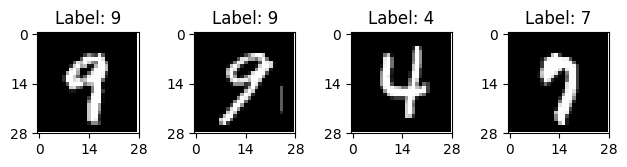

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.tight_layout()
    plt.imshow(example_features[i][0], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(example_labels[i]))
    plt.xticks([0,14,28])
    plt.yticks([0,14,28])
plt.show()

## Implementing a Neural Network

Import the `torch.nn` and construct a sequential neural network (choose your own structure; maybe not too large) for classification. Starting with the `nn.Flatten` layer migth be very helpful.

In [ ]:
from torch import nn
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 100),
                    nn.ReLU(),
                    nn.Linear(100, 50),
                    nn.ReLU(),
                    nn.Linear(50, 10))

Use the `CrossEntropyLoss` (`reduction='sum'` might be helpful later) and `torch.optim.Adam`for optimization.

In [ ]:
loss = nn.CrossEntropyLoss(reduction='sum')
trainer = torch.optim.Adam(net.parameters(), lr=0.03)

Initialize all weights of your network from a normal distribution with standard deviation $0.01$.

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

torch.manual_seed(42) #set a seed for replicability
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=50, bias=True)
  (4): ReLU()
  (5): Linear(in_features=50, out_features=10, bias=True)
)

Before we start training our network, use our `train_loader` and `test_loader` to evaluate the loss on our training and testing data (this might take a while).

In [ ]:
training_loss = 0
test_loss = 0
with torch.no_grad():
    for batch_idx, (X, Y) in enumerate(train_loader):
        training_loss += loss(net(X) ,Y)
    for batch_idx, (X, Y) in enumerate(test_loader):
        test_loss += loss(net(X) ,Y)
training_loss/len(mnist_train),test_loss/len(mnist_test)

(tensor(2.3062), tensor(2.3062))

Specify the number of epochs to $1$ and start training your network. Afterwards evaluate the loss.

In [ ]:
num_epochs = 1

for epoch in range(num_epochs):
    #train the network
    net.train()
    for batch_idx, (X, Y) in enumerate(train_loader):
        training_loss = loss(net(X) ,Y)/len(X)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()

In [ ]:
training_loss = 0
test_loss = 0
with torch.no_grad():
    for batch_idx, (X, Y) in enumerate(train_loader):
        training_loss += loss(net(X) ,Y)
    for batch_idx, (X, Y) in enumerate(test_loader):
        test_loss += loss(net(X) ,Y)
training_loss/len(mnist_train),test_loss/len(mnist_test)

(tensor(0.3250), tensor(0.3396))

We would like to get more information printed during the training process. Increase the number of epochs to $5$ and every $50$ batches print the current epoch and loss on the batch (you can add the number of used observations in the epoch as well). Further add the end of each epoch evaluate the loss on the training set. Before starting reinitialize the weights randomly.


In [ ]:
num_epochs = 5
log_interval = 50

torch.manual_seed(42) #set a seed for replicability
net.apply(init_weights)
for epoch in range(num_epochs):
    #train the network
    net.train()
    for batch_idx, (X, Y) in enumerate(train_loader):
        training_loss = loss(net(X) ,Y)/len(X)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()
        if batch_idx % log_interval == 0:
            print('Training: Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, batch_idx * len(X), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), training_loss))
    #evaluate the test set
    net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for X, Y in test_loader:
            prediction = net(X)
            test_loss += loss(prediction, Y)
            max_prediction = prediction.data.max(1)[1]
            correct += max_prediction.eq(Y).sum()
        test_loss /= len(test_loader.dataset)
        print('\nTesting: Avg. loss: {:.4f}\n'.format(test_loss))

Training: Epoch: 1 [0/60000 (0%)]	Loss: 2.389790
Training: Epoch: 1 [3200/60000 (5%)]	Loss: 1.659772
Training: Epoch: 1 [6400/60000 (11%)]	Loss: 1.461385
Training: Epoch: 1 [9600/60000 (16%)]	Loss: 1.697690
Training: Epoch: 1 [12800/60000 (21%)]	Loss: 1.441416
Training: Epoch: 1 [16000/60000 (27%)]	Loss: 1.171854
Training: Epoch: 1 [19200/60000 (32%)]	Loss: 1.032149
Training: Epoch: 1 [22400/60000 (37%)]	Loss: 1.171602
Training: Epoch: 1 [25600/60000 (43%)]	Loss: 0.836310
Training: Epoch: 1 [28800/60000 (48%)]	Loss: 0.815901
Training: Epoch: 1 [32000/60000 (53%)]	Loss: 0.952529
Training: Epoch: 1 [35200/60000 (59%)]	Loss: 0.891289
Training: Epoch: 1 [38400/60000 (64%)]	Loss: 0.699421
Training: Epoch: 1 [41600/60000 (69%)]	Loss: 0.710233
Training: Epoch: 1 [44800/60000 (75%)]	Loss: 0.666376
Training: Epoch: 1 [48000/60000 (80%)]	Loss: 0.747662
Training: Epoch: 1 [51200/60000 (85%)]	Loss: 0.993905
Training: Epoch: 1 [54400/60000 (91%)]	Loss: 0.605313
Training: Epoch: 1 [57600/60000 (96%)

Next, take a look at a specific predicition on your example batch from above and compare the predictions to the corresponding labels.

In [ ]:
i = 63
with torch.no_grad():
    prediction = net(example_features[i])
    max_prediction = prediction.data.max(1)[1]
    print(max_prediction, example_labels[i])

max_prediction.eq(example_labels[i])

tensor([4]) tensor(4)


tensor([True])

Use this to evaluate the share of accuracy (share correctly predicted labels) on the test set at each epoch. Additionally, log all the printed losses. Again, before starting reinitialize the weights randomly.

In [ ]:
num_epochs = 5
log_interval = 50

train_losses = []
test_losses = []

torch.manual_seed(42) #set a seed for replicability
net.apply(init_weights)

#evaluate test loss
test_loss = 0
with torch.no_grad():
    for batch_idx, (X, Y) in enumerate(test_loader):
        test_loss += loss(net(X) ,Y)
test_losses.append(test_loss/len(mnist_test))


for epoch in range(num_epochs):
    #train the network
    net.train()
    for batch_idx, (X, Y) in enumerate(train_loader):
        training_loss = loss(net(X) ,Y)/len(X)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()
        if batch_idx % log_interval == 0:
            print('Training: Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, batch_idx * len(X), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), training_loss))
            train_losses.append(training_loss.detach())
    #evaluate the test set
    net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for X, Y in test_loader:
            prediction = net(X)
            test_loss += loss(prediction, Y)
            max_prediction = prediction.data.max(1)[1]
            correct += max_prediction.eq(Y).sum()
        test_loss /= len(test_loader.dataset)
        print('\nTest Sample: Risk/Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),
                                                                              100. * correct / len(test_loader.dataset)))
        test_losses.append(test_loss)

Training: Epoch: 1 [0/60000 (0%)]	Loss: 4.476136
Training: Epoch: 1 [3200/60000 (5%)]	Loss: 2.031068
Training: Epoch: 1 [6400/60000 (11%)]	Loss: 1.887259
Training: Epoch: 1 [9600/60000 (16%)]	Loss: 1.834266
Training: Epoch: 1 [12800/60000 (21%)]	Loss: 1.859072
Training: Epoch: 1 [16000/60000 (27%)]	Loss: 1.720608
Training: Epoch: 1 [19200/60000 (32%)]	Loss: 1.874536
Training: Epoch: 1 [22400/60000 (37%)]	Loss: 1.717842
Training: Epoch: 1 [25600/60000 (43%)]	Loss: 1.563319
Training: Epoch: 1 [28800/60000 (48%)]	Loss: 1.599142
Training: Epoch: 1 [32000/60000 (53%)]	Loss: 1.789093
Training: Epoch: 1 [35200/60000 (59%)]	Loss: 1.574206
Training: Epoch: 1 [38400/60000 (64%)]	Loss: 1.770882
Training: Epoch: 1 [41600/60000 (69%)]	Loss: 1.715656
Training: Epoch: 1 [44800/60000 (75%)]	Loss: 1.943973
Training: Epoch: 1 [48000/60000 (80%)]	Loss: 1.624005
Training: Epoch: 1 [51200/60000 (85%)]	Loss: 1.726405
Training: Epoch: 1 [54400/60000 (91%)]	Loss: 1.702293
Training: Epoch: 1 [57600/60000 (96%)

Plot the logged losses in a suitable plot.

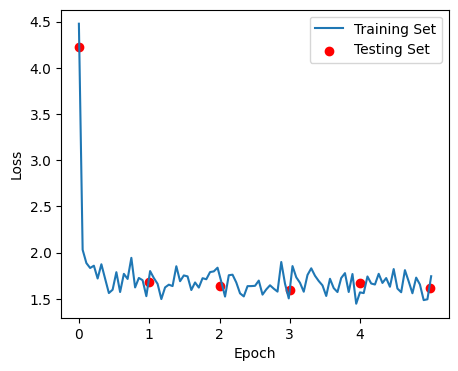

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,4))
plt.plot(torch.arange(len(train_losses),dtype = float)/len(train_loader)*log_interval,train_losses, label='Training Set')
plt.scatter(torch.arange(len(test_losses),dtype = float),torch.stack(test_losses), label='Testing Set', color = "red")
plt.ylabel('Loss');plt.xlabel('Epoch');plt.xticks(np.arange(0, num_epochs, step=1))
plt.legend()
plt.show()

Neural network modules as well as optimizers have the ability to save and load their internal state using `.state_dict()`.
`load_state_dict(state_dict)`. See [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html) for saving and loading models. What does the dictionary save?

### GPUs
Use GPUs for training your model.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
#loss = nn.NLLLoss()
loss = nn.CrossEntropyLoss(reduction='sum')
#trainer = torch.optim.SGD(deep_net.parameters(), lr=0.03) #a modified version of SDG
trainer = torch.optim.Adam(net.parameters(), lr=0.03)

In [ ]:
num_epochs = 5
log_interval = 50

train_losses = []
test_losses = []

torch.manual_seed(42) #set a seed for replicability
net.apply(init_weights)
net.to(device)

#evaluate test loss
test_loss = 0
with torch.no_grad():
    for data in test_loader:
        X,Y = data[0].to(device),data[1].to(device)
        test_loss += loss(net(X) ,Y)
test_losses.append(test_loss.to("cpu")/len(mnist_test))


for epoch in range(num_epochs):
    #train the network
    net.train()
    for batch_idx, data in enumerate(train_loader):
        X,Y = data[0].to(device),data[1].to(device)
        training_loss = loss(net(X) ,Y)/len(X)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()
        if batch_idx % log_interval == 0:
            print('Training: Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, batch_idx * len(X), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), training_loss))
            train_losses.append(training_loss.to("cpu").detach())
    #evaluate the test set
    net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data in test_loader:
            X,Y = data[0].to(device),data[1].to(device)
            prediction = net(X)
            test_loss += loss(prediction, Y)
            max_prediction = prediction.data.max(1,keepdim=True)[1]
            correct += max_prediction.eq(Y.data.reshape(-1,1)).sum()
        test_loss /= len(test_loader.dataset)
        print('\nTest Sample: Risk/Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),
                                                                              100. * correct / len(test_loader.dataset)))
        test_losses.append(test_loss.to("cpu"))


Training: Epoch: 1 [0/60000 (0%)]	Loss: 3.902964
Training: Epoch: 1 [3200/60000 (5%)]	Loss: 0.940670
Training: Epoch: 1 [6400/60000 (11%)]	Loss: 0.734700
Training: Epoch: 1 [9600/60000 (16%)]	Loss: 0.436788
Training: Epoch: 1 [12800/60000 (21%)]	Loss: 0.424541
Training: Epoch: 1 [16000/60000 (27%)]	Loss: 0.491588
Training: Epoch: 1 [19200/60000 (32%)]	Loss: 0.476664
Training: Epoch: 1 [22400/60000 (37%)]	Loss: 0.403872
Training: Epoch: 1 [25600/60000 (43%)]	Loss: 0.190499
Training: Epoch: 1 [28800/60000 (48%)]	Loss: 0.681419
Training: Epoch: 1 [32000/60000 (53%)]	Loss: 0.314819
Training: Epoch: 1 [35200/60000 (59%)]	Loss: 0.395495
Training: Epoch: 1 [38400/60000 (64%)]	Loss: 0.215445
Training: Epoch: 1 [41600/60000 (69%)]	Loss: 0.340821
Training: Epoch: 1 [44800/60000 (75%)]	Loss: 0.519284
Training: Epoch: 1 [48000/60000 (80%)]	Loss: 0.355163
Training: Epoch: 1 [51200/60000 (85%)]	Loss: 0.619193
Training: Epoch: 1 [54400/60000 (91%)]	Loss: 0.390683
Training: Epoch: 1 [57600/60000 (96%)

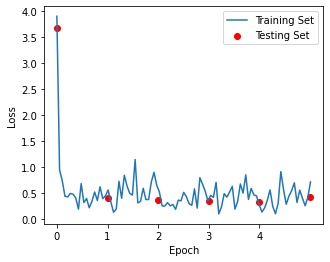

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,4))
plt.plot(torch.arange(len(train_losses),dtype = float)/len(train_loader)*log_interval,train_losses, label='Training Set')
plt.scatter(torch.arange(len(test_losses),dtype = float),torch.stack(test_losses), label='Testing Set', color = "red")
plt.ylabel('Loss');plt.xlabel('Epoch');plt.xticks(np.arange(0, num_epochs, step=1))
plt.legend()
plt.show()